<a href="https://colab.research.google.com/github/samuelmat/DSPS_sMatylewicz/blob/master/HW9/higgsbosonSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json 
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


In [0]:
pip install kaggle

In [0]:
cd /content

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-196-84160950ea11>", line 1, in <module>
    get_ipython().magic('cd /content')
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2160, in magic
    return self.run_line_magic(magic_name, magic_arg_s)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2081, in run_line_magic
    result = fn(*args,**kwargs)
  File "</usr/local/lib/python3.6/dist-packages/decorator.py:decorator-gen-91>", line 2, in cd
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/magic.py", line 188, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/magics/osm.py", line 288, in cd
    oldcwd = py3compat.getcwd()
OSError: [Errno 107] Transport endpoint is not con

OSError: ignored

In [0]:
!mkdir -p ~/.kaggle

In [0]:
cd content/drive/My\ Drive

In [0]:
cp kaggle.json ~/.kaggle

In [0]:
cd ~/.kaggle/

In [0]:
ls kaggle.json

In [0]:
!chmod 600 kaggle.json

In [0]:
envs = json.load(open("kaggle.json", "r"))
os.environ["samuelmatylewicz"] = envs['username']
os.environ["7aef729ce3a9d1cea105dad2e95f6254"] = envs['key']

print(envs)

In [0]:
!kaggle datasets list

- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS/blob/master/lab9/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data


In [3]:
cd drive/My\ Drive/dsps

/content/drive/My Drive/dsps


In [0]:
!mkdir higgsboson/

In [4]:
cd higgsboson/

/content/drive/My Drive/dsps/higgsboson


In [0]:
!kaggle competitions download -c higgs-boson

In [0]:
!ls

In [0]:
!unzip training.zip


- Read in the trainind data. Split the provided training data into a training and a test set. 
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [5]:
higgsdata = pd.read_csv('training.csv').drop(columns=["Weight", "Label"])
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [6]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,0.844743,1.193585,453.596721,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,-999.000000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [0]:
a = pd.read_csv("training.csv").drop(columns=higgsdata.columns)
labels = a["Label"].to_numpy()
weights = a["Weight"].to_numpy()

In [8]:
labels

array(['s', 'b', 'b', ..., 's', 'b', 'b'], dtype=object)

In [9]:
weights

array([0.00265331, 2.23358449, 2.34738894, ..., 0.01863612, 1.68161144,
       1.87747381])

In [0]:
# leave
from sklearn.model_selection import train_test_split 

- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [11]:
#leave 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 0)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [12]:
gbt = GradientBoostingClassifier(random_state = 0)
print(gbt.get_params())

{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [0]:
train, test = train_test_split(higgsdata, train_size = 0.75, random_state = 0)

In [14]:
labels.size

250000

In [15]:
rf.fit(train, labels[train.index]);

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
gbt.fit(train, labels[train.index]);

In [0]:
rfTrainPredict = pd.DataFrame(rf.predict(train))

In [0]:
rfTestPredict = pd.DataFrame(rf.predict(test))

In [0]:
gbtTrainPredict = pd.DataFrame(gbt.predict(train))

In [0]:
gbtTestPredict = pd.DataFrame(gbt.predict(test))

calculate the  scores for the training and test sets and evaluate  overtraining etc

In [21]:
print(rf.score(train, labels[train.index]))
print(rf.score(test, labels[test.index]))

0.9878986666666667
0.823392


In [22]:
print(gbt.score(train, labels[train.index]))
print(gbt.score(test, labels[test.index]))

0.83352
0.832496


Becuase my training score is significantly higher than my test score, we can say that this is an example of overfitting.

- Produce a confusion matrix for each model and compare them


 



In [0]:

# I creaded this function (mostly copied from sklearn examples). 
# You can use it to create the confusion matrix
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='',
                          cmap=pl.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """         
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(cm, cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    pl.xticks([0, 1], labels=["N", "P"])
    pl.ylim(-0.5,1.5)
    pl.yticks([0,1], labels=["N", "P"])    
    pl.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = colorbar(im, cax=cax)
    

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


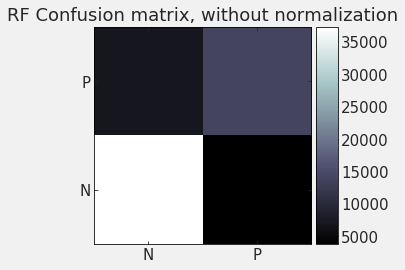

In [24]:
plot_confusion_matrix(labels[test.index], rfTestPredict, normalize=False, title='RF', cmap=pl.cm.bone)

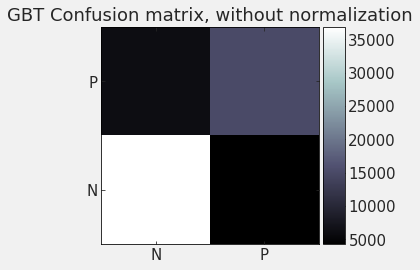

In [25]:
plot_confusion_matrix(labels[test.index], gbtTestPredict, normalize=False, title='GBT', cmap=pl.cm.bone)

<span style="color:red">**-10 pts: no caption no score**</span>

both confusion matricies show many occurances correctly predicted in the NN and PP regions. There were few incorrectly predicted occurances in the NP and PN regions. It is hard to tell which is a better fit with just the matrix.


- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [27]:
rfr = RandomForestRegressor(n_estimators=100, max_depth=3, random_state = 0)
print(rfr.get_params())

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [28]:
gbtr = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state = 0)
print(gbtr.get_params())

{'alpha': 0.9, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [0]:
rfr.fit(train, weights[train.index]);

In [0]:
gbtr.fit(train, weights[train.index]);

In [0]:
rfrTrainPredict = rfr.predict(train)
rfrTestPredict = rfr.predict(test)
gbtrTrainPredict = gbtr.predict(train)
gbtrTestPredict = gbtr.predict(test)

In [32]:
print(rfr.score(train, weights[train.index]))
print(rfr.score(test, weights[test.index]))
print(gbtr.score(train, weights[train.index]))
print(gbtr.score(test, weights[test.index]))

0.47961412670510356
0.47511165179099857
0.6172164023823019
0.6091951465292083


 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [33]:
rfrL1 = sum(abs(weights[test.index]-rfrTestPredict))
rfrL2 = sum((weights[test.index]-rfrTestPredict)**2)
gbtrL1 = sum(abs(weights[test.index]-gbtrTestPredict))
gbtrL2 = sum((weights[test.index]-gbtrTestPredict)**2)

print("L1 rfr = ", rfrL1)
print("L2 rfr = ", rfrL2)
print("L1 gtbr = ", gbtrL1)
print("L2 gtbr = ", gbtrL2)

L1 rfr =  62814.31060183018
L2 rfr =  114399.41134115434
L1 gtbr =  52788.27875281596
L2 gtbr =  85175.91472333991


Because the L1 and L2 losses for gtbr is less than rfr we can say the gtbr is more accurate.

- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)

Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

 



In [38]:
importances = [(i, j) for i, j in zip(train.columns, rf.feature_importances_)]
importances.sort(key = lambda x: x[1], reverse = True)
for i in range(4):
  print(importances[i])
bestFeatures = [importances[i][0] for i in range(4)]

('DER_mass_MMC', 0.16458215697697076)
('DER_mass_transverse_met_lep', 0.10598466206387949)
('DER_mass_vis', 0.06884320139223586)
('PRI_tau_pt', 0.05646904770554453)


In [39]:
random_grid = {'max_depth': [3, 10, None], 'max_features': ['auto', 'sqrt'], 'n_estimators': [10, 100]}
print(random_grid)

{'max_depth': [3, 10, None], 'max_features': ['auto', 'sqrt'], 'n_estimators': [10, 100]}


In [35]:
higgsdata[bestFeatures]

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,PRI_tau_pt
0,138.470,51.655,97.827,32.638
1,160.937,68.768,103.235,42.014
2,-999.000,162.172,125.953,32.154
3,143.905,81.417,80.943,22.647
4,175.864,16.915,134.805,28.209
...,...,...,...,...
249995,-999.000,71.989,36.548,24.754
249996,-999.000,58.179,68.083,23.416
249997,105.457,60.526,75.839,35.636
249998,94.951,19.362,68.812,27.944


 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [0]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 18 different combinations
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,
                                   n_iter=1, cv=3, iid=False)

Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [0]:
random_search.fit(higgsdata[bestFeatures], labels);

In [40]:
print(random_search.cv_results_['split0_test_score'][0])
print(random_search.cv_results_['split1_test_score'][0])
print(random_search.cv_results_['split2_test_score'][0])

0.7915016679866561
0.7909856721146231
0.7917726683626938


In [46]:
print("Tuned RF  Parameters: ", bestFeatures)

Tuned RF  Parameters:  ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'PRI_tau_pt']


<span style="color:red">**-2.5 pts: missing the best score**</span>

<span style="color:red">**-2.5 pts: Tuned RF parameters is not the most important columns, it is the best parameters for RF model which means best max_depth, max_feature, etc.**</span>

In [0]:
df = pd.DataFrame(random_search.cv_results_)

In [48]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.642151,0.021581,0.238244,0.014014,10,sqrt,3,"{'n_estimators': 10, 'max_features': 'sqrt', '...",0.791502,0.790986,0.791773,0.79142,0.000326,1


# Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it. 

In [51]:
rf.fit(train, labels[train.index].flatten()=="s")

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

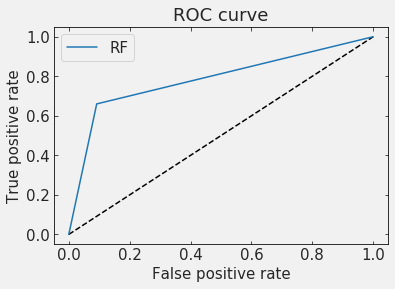

In [53]:
# The random forest model by itself
from sklearn.metrics import roc_curve
y_pred_grd_rfcat = rf.predict_proba(test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(labels[test.index].flatten()=="s", rf.predict(test))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


<span style="color:red">**-5 pts: no caption no score**</span>

the ROC curve shows a larger slope before flattening.